In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Iris Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- sepal length (cm): 암술 길이
- sepal width (cm): 암술 넓이
- petal length (cm): 수술 길이
- petal width (cm): 수술 넓이
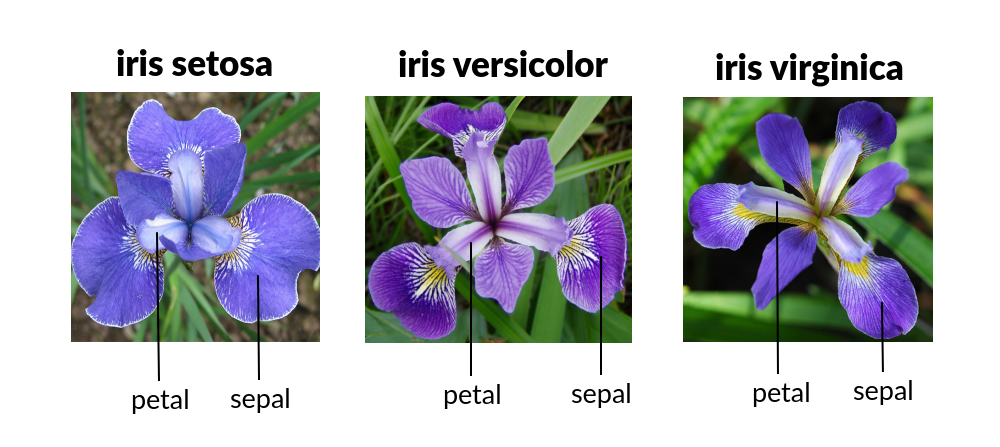

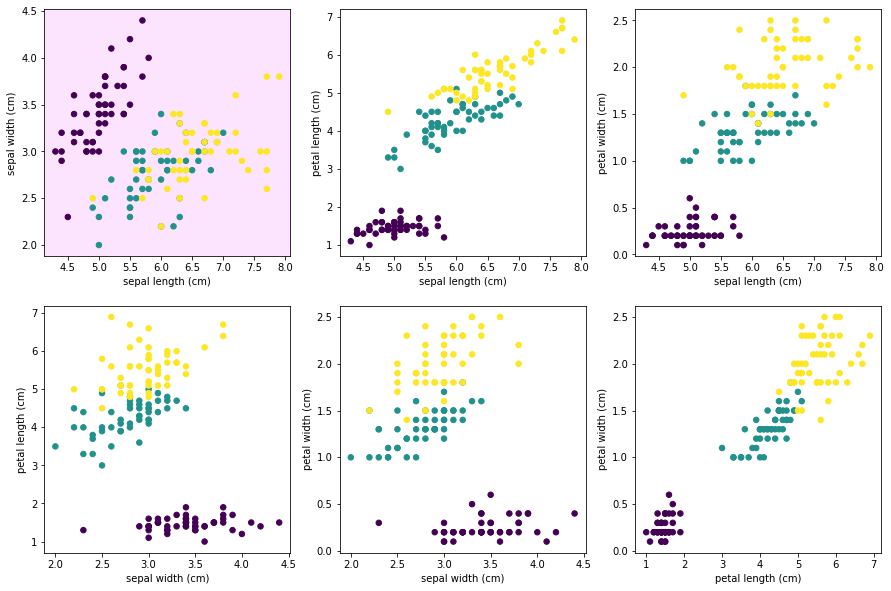

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    ax = axes[idx//3, idx%3]
    ax.scatter( x=data[:, x], y=data[:, y], c=target, s=30 )
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])
    if x == 0 and y == 1:
      ax.set_facecolor("#FCE4FF")

In [5]:
data = data[target !=0, :2]
target = target[target !=0]

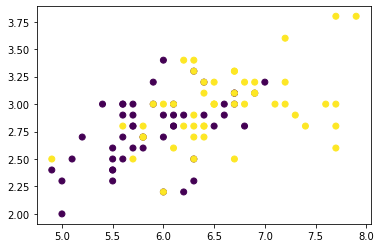

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=42
)

## Linear Kernel

기본적인 svm 커널: linear 커널

In [8]:
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")

In [9]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

In [10]:
# svm의 결과를 시각화 하기 위한 함수
def plot_support_vector_machine(svm, ax):
    # 전체 데이터
    ax.scatter(data[:, 0], data[:, 1], c=target, zorder=10, edgecolor='k', s=100)
    # test 데이터
    ax.scatter(test_data[:, 0], test_data[:, 1], s=30, facecolors='none', zorder=10, edgecolor='k')
    

    ax.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()
    
    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX, YY, Z > 0, shading="auto")
    ax.contour(XX, YY, Z, colors=['r', 'r', 'r'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    

plot의 속성
- 빨간색 직선: decision boundary
- 빨간색 점선: support vector
- 보라색, 노란색 영역: 클래스로 구별되는 영역

In [14]:
np.random.seed(42)

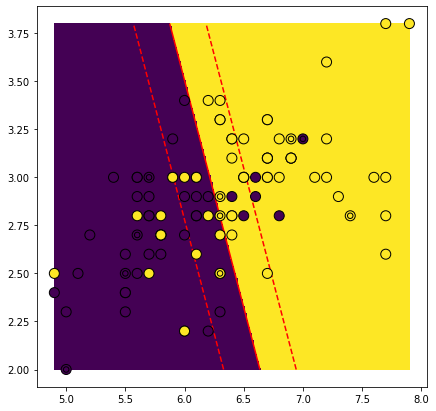

In [13]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc, plt)

## Poly Kernel

직선을 곡선으로 mapping 시켜주는 커널
- gamma: 결경 경계를 스케일링해주는 값
- degree: 몇 차원의 곡선으로 맵핑할지 정해주는 값

In [15]:
def SVCProcess(ax_plt, kernel="poly", gamma="scale", degree = 3):
  poly_svc = SVC(kernel=kernel, gamma=gamma, degree =degree)
  poly_svc.fit(train_data, train_target)
  plt.figure(figsize=(7,7))
  plot_support_vector_machine(poly_svc, ax_plt)

gamma
- "Scale" vs 0.1 vs 10

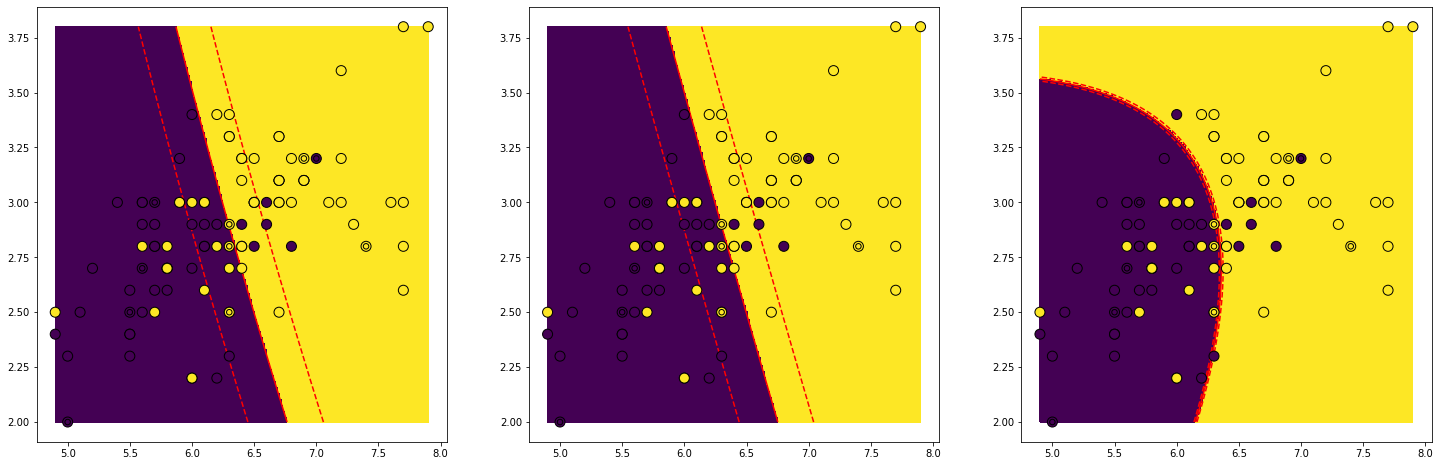

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

# default 옵션은 자동으로 scaling 해줍니다.
SVCProcess(kernel="poly", gamma="scale", ax_plt = ax1)

# gamma=0.1
SVCProcess(kernel="poly", gamma=0.1, ax_plt = ax2)

# gamma=10
SVCProcess(kernel="poly", gamma=10, ax_plt = ax3)

degree
- degree=2 vs degree=4

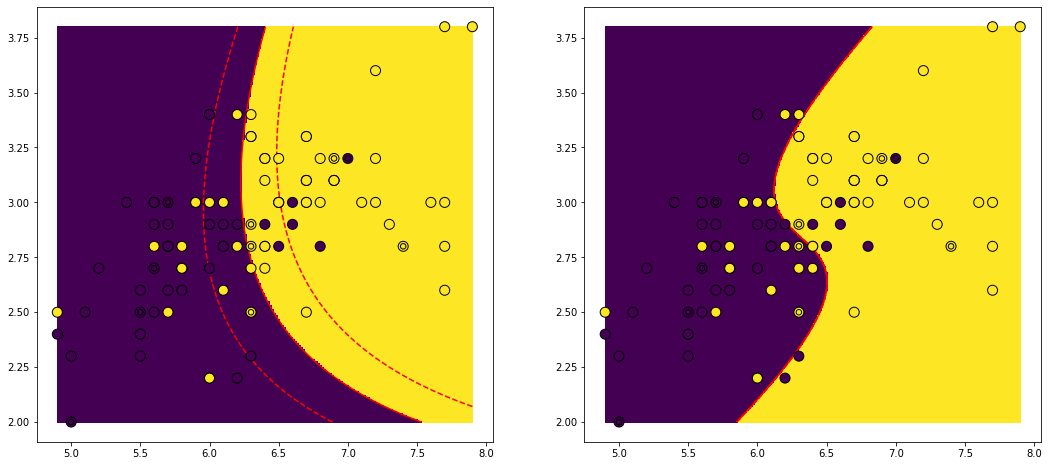

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

SVCProcess(kernel="poly", gamma=10, ax_plt = ax1, degree = 2)

SVCProcess(kernel="poly", gamma=10, ax_plt = ax2, degree = 4)

## RBF Kernel

rbf 커널은 데이터를 고차원의 공간으로 mapping
rbf또한 gamma 값으로 scaling

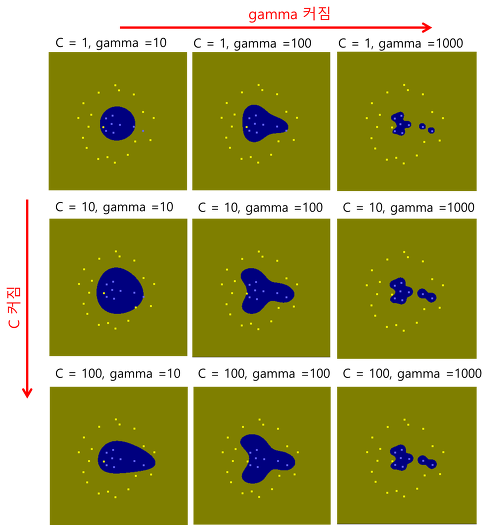

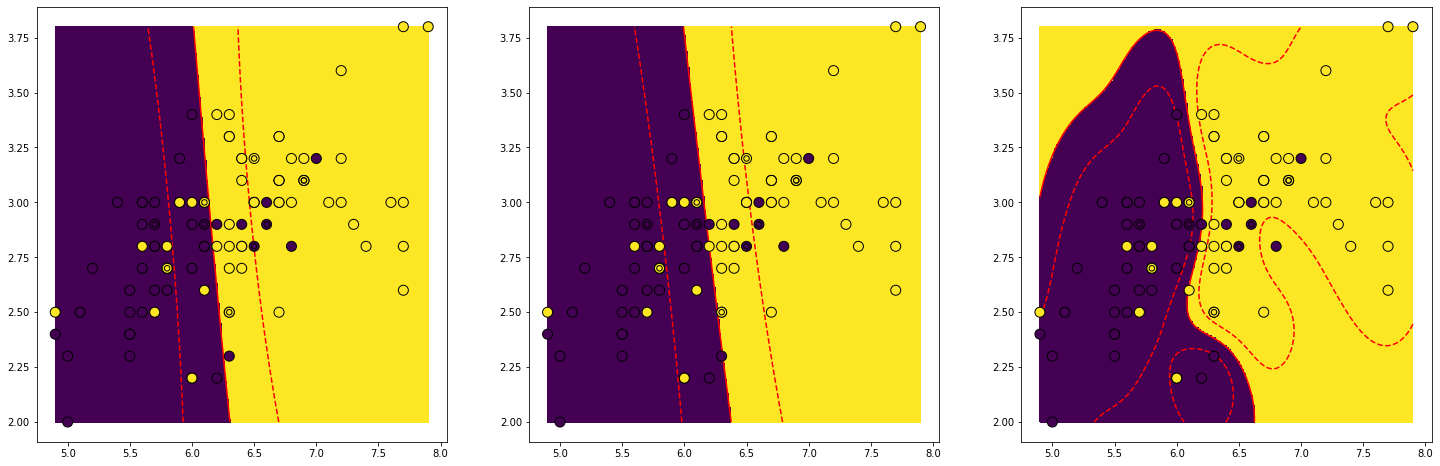

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

SVCProcess(kernel="rbf", gamma="scale", ax_plt = ax1)

SVCProcess(kernel="rbf", gamma=0.1, ax_plt = ax2)

SVCProcess(kernel="rbf", gamma=10, ax_plt = ax3)

## Penalty

패너티는 `C` argument를 통해 줄 수 있습니다.

Poly

Text(0.5, 1.0, 'Hard penalty')

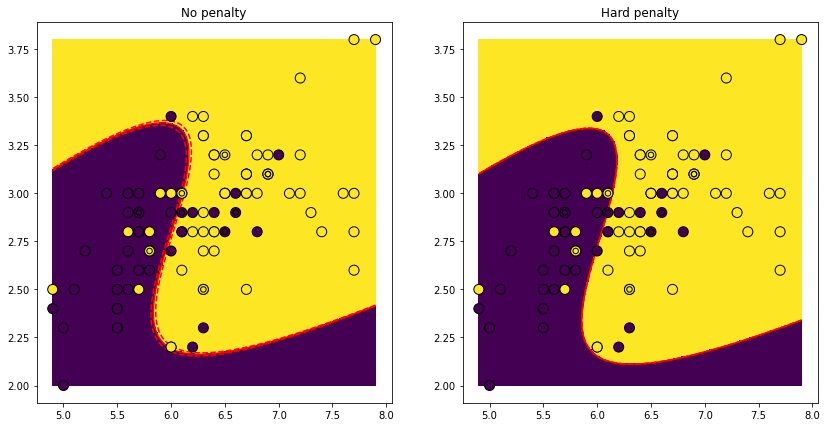

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)
plot_support_vector_machine(poly_svc, plt)



plt.title("No penalty")
plt.subplot(1,2,2)
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)
plot_support_vector_machine(hard_penalty_poly_svc,plt)
plt.title("Hard penalty")

RBF

Text(0.5, 1.0, 'Hard penalty')

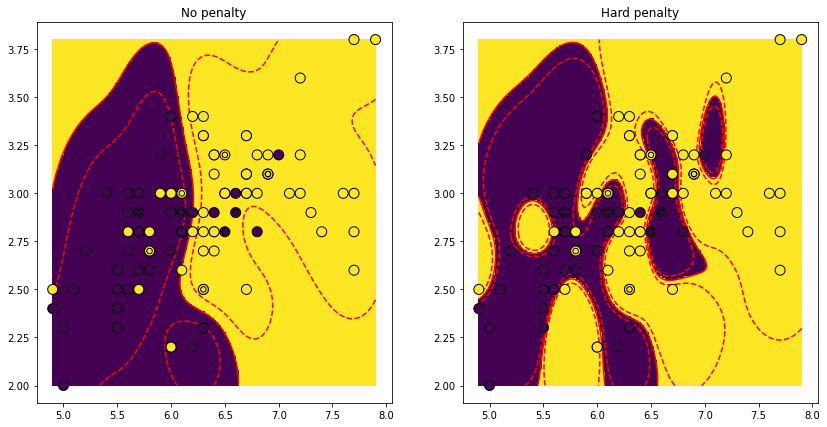

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)
plot_support_vector_machine(rbf_svc, plt)
plt.title("No penalty")

plt.subplot(1,2,2)
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)
plot_support_vector_machine(hard_penalty_svc,plt)
plt.title("Hard penalty")